In [28]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression

#### |Dataset - extracted from file |

In [29]:
def read_data():
    data = pd.read_csv("D:/Data Science/Tabelue/delivery_time.csv")
    return data

In [30]:
data = read_data()
print(data.head())

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


#### |Preprocessing Data |

In [31]:
print("The number of Rows and columns - ", data.shape)

The number of Rows and columns -  (21, 2)


In [32]:
print("The data types - ",data.dtypes)

The data types -  Delivery Time    float64
Sorting Time       int64
dtype: object


In [33]:
print("The Number of Missing Records - ")
data.isnull().sum()

The Number of Missing Records - 


Delivery Time    0
Sorting Time     0
dtype: int64

#### | Exploratory Data Analysis |

In [34]:
print(data.describe())

       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


C:\Users\nitin\AppData\Local\Temp\ipykernel_968\2789452069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['Delivery Time'])


0.3523900822831107


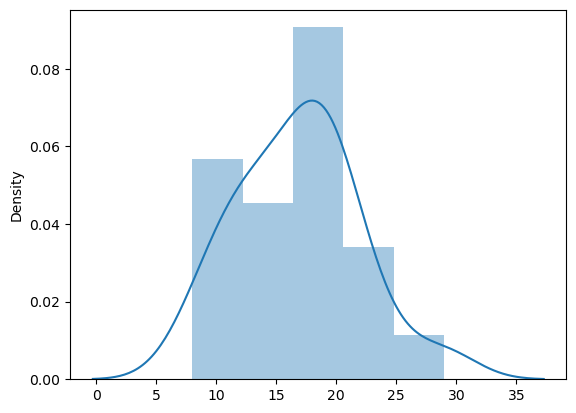

In [35]:
sns.distplot(x = data['Delivery Time'])
print(data['Delivery Time'].skew())

0.047115474210530174


C:\Users\nitin\AppData\Local\Temp\ipykernel_968\2929183245.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data['Sorting Time'])


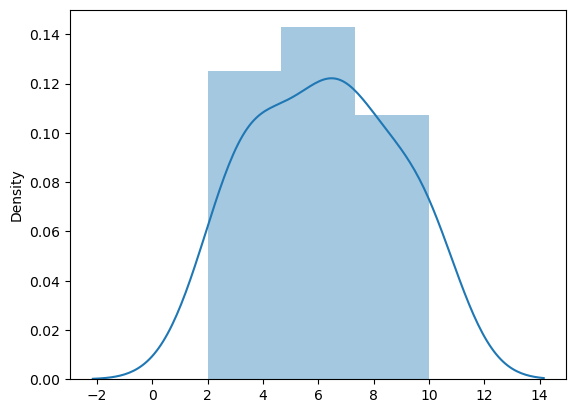

In [36]:
sns.distplot(x = data['Sorting Time'])
print(data['Sorting Time'].skew())

<Axes: xlabel='Delivery Time'>

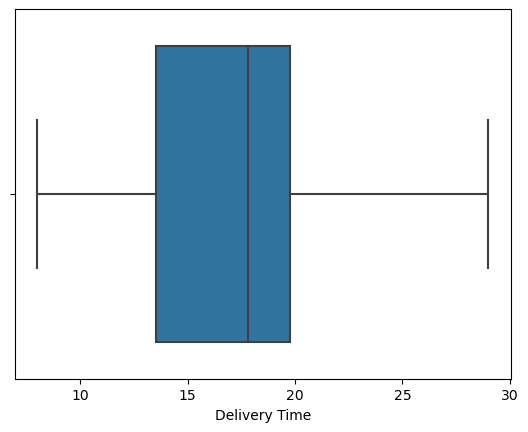

In [37]:
sns.boxplot(x = data['Delivery Time'])

<Axes: xlabel='Sorting Time'>

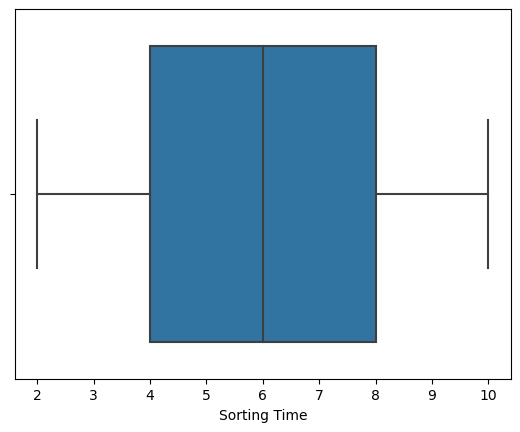

In [38]:
sns.boxplot(x = data['Sorting Time'])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

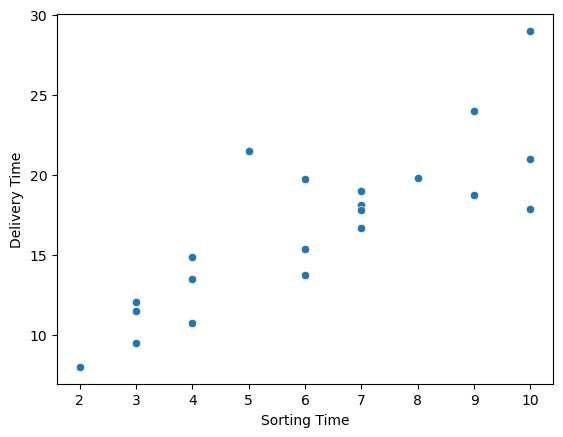

In [55]:
sns.scatterplot(x = data['Sorting Time'], y = data['Delivery Time'])

<Axes: >

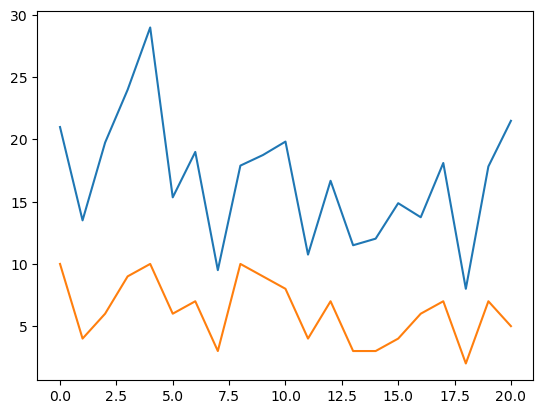

In [40]:
data['Delivery Time'].plot()
data['Sorting Time'].plot()

#### |Sampling of the Data - Testing & Training the model|

In [41]:
from sklearn.model_selection import train_test_split 

In [42]:
X = data ['Delivery Time'].values.reshape(-1,1)
X

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [43]:
y = data ['Sorting Time'].values.reshape(-1,1)
y

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [45]:
X_train.shape, X_test.shape

((15, 1), (6, 1))

In [46]:
y_test.shape, y_train.shape

((6, 1), (15, 1))

#### | Modeling Part |

In [47]:
model = LinearRegression()
model_train = model.fit(X_train, y_train)
print("Model Training is Completed")

Model Training is Completed


#### | Validating Model |

In [48]:
pred = model.predict(X_test)
pred

array([[ 7.65807578],
       [ 9.49893838],
       [ 4.314203  ],
       [ 2.56863211],
       [11.66465909],
       [ 8.19950595]])

In [49]:
y_test

array([[ 6],
       [ 9],
       [ 3],
       [ 2],
       [10],
       [10]], dtype=int64)

In [50]:
pred

array([[ 7.65807578],
       [ 9.49893838],
       [ 4.314203  ],
       [ 2.56863211],
       [11.66465909],
       [ 8.19950595]])

In [51]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [52]:
r2_score(y_test,pred) ## more high is good

0.8253448082232523

In [53]:
mean_squared_error(y_test,pred) ### as less as possible

1.84358257986567

In [54]:
sqrt(mean_squared_error(y_test,pred)) ### rmse- should be within 0

1.3577859109099895